In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
filename = '~/data/patient_report/all_patient_data.csv'
df = pd.read_csv(filename)
df['Primary / secondary category'].fillna(' ',inplace=True)
df['Full action description'].fillna(' ',inplace=True)

df2 = df[df['Primary / secondary category'] != ' ']

df2 = df2[df2['Full action description'] != ' ']

print(len(df2))

subject = df2['Action subject'].fillna(' ').to_list()
full_text = df2['Full action description'].fillna(' ').to_list()
label = df2['Primary / secondary category'].fillna(' ').to_list()
solution = df2['Resolution response'].fillna(' ').to_list()

74260


In [4]:
primary_list = []
second_list = []
for l in label:
    split = l.split('-')
    pri = split[0]
    sec = split[1]
    primary_list.append(pri)
    second_list.append(sec)
df2['Primary'] = primary_list
df2['Secondary'] = second_list

In [5]:
len(primary_list)

74260

26


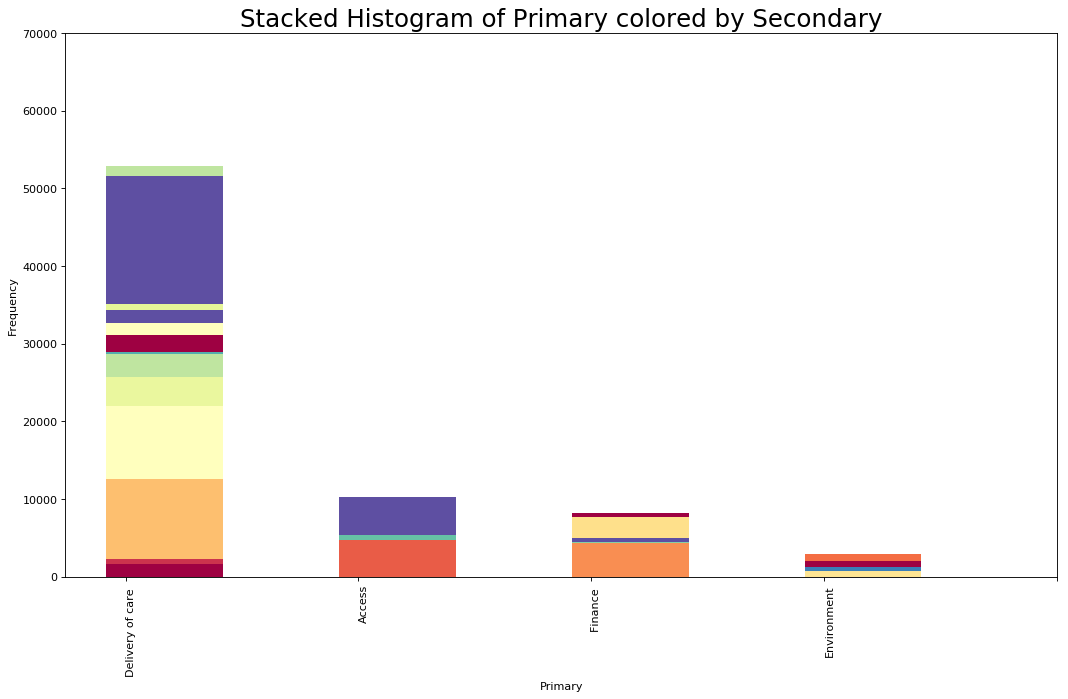

In [7]:
# Import Data
#df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = df2
# Prepare data
x_var = 'Primary'
groupby_var = 'Secondary'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
len_val = 13
color_per_primary = []
for i in [13,3,6,4]:
    for j in range(i):
        color_per_primary.append(plt.cm.Spectral(j/float(i-1)))
print(len(color_per_primary))
n, bins, patches = plt.hist(vals, df[x_var].unique().__len__(), stacked=True, density=False, color=color_per_primary,rwidth=0.5)

# Decoration
#plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title("Stacked Histogram of {} colored by {}".format(x_var,groupby_var), fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 70000)
plt.xticks(ticks=bins+0.25, labels=['Delivery of care ', 'Access','Finance ', 'Environment'], rotation=90, horizontalalignment='left')
#plt.xticks(ticks=bins, labels=np.unique(df[x_var]).tolist(), rotation=90, horizontalalignment='left')
plt.show()
#sort the secondary by porpotion
#label with abbr, arrows for the narrow 

In [8]:
np.unique(df[x_var]).tolist()

['Access ', 'Delivery of care ', 'Environment ', 'Finance ']

In [9]:
np.unique(df[groupby_var]).tolist()

[' Accommodation',
 ' Adaptive aids / equipment',
 ' Availability / arranging services',
 ' Billing',
 ' Care plan',
 ' Cleanliness',
 ' Communication style',
 ' Diagnosis / assessment',
 ' Discharge',
 ' EMS Billing ',
 ' Emotional support',
 ' Food',
 ' Funding',
 ' Governance / policies & procedures',
 ' Health information / confidentiality',
 ' Information sharing / participation',
 ' Maintenance / upkeep',
 ' Parking',
 ' Personal property',
 ' Physical comfort',
 ' Postponement',
 ' Practice standards',
 ' Preferred accommodation',
 ' Request for Compensation / Reimbursement',
 ' Services coordination',
 ' Wait times']

In [20]:
import numpy as np

def removeOutliers(x, outlierConstant):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    print('upper_quartile: ' + str(upper_quartile))
    lower_quartile = np.percentile(a, 25)
    print('lower_quartile: ' + str(lower_quartile))
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    resultList = []
    for y in a.tolist():
        if y >= quartileSet[0] and y <= quartileSet[1]:
            resultList.append(y)
    return resultList

In [21]:
print(np.mean(len_statis))
print(np.var(len_statis))

129.54729329383247
24787.64049159645


upper_quartile: 173.0
lower_quartile: 30.0


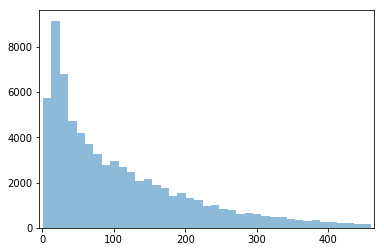

In [22]:
import numpy as np
import math
from matplotlib import pyplot as plt
total_list_clean = removeOutliers(len_statis, 2)
data2 = total_list_clean
bins = np.linspace(math.ceil(min(data2)), 
                   math.floor(max(data2)),
                   40) # fixed number of bins

plt.xlim([min(data2)-5, max(data2)+5])
plt.hist(data2, bins=bins, alpha=0.5)
plt.show()
# LDA topics of docs

upper_quartile: 173.0
lower_quartile: 30.0


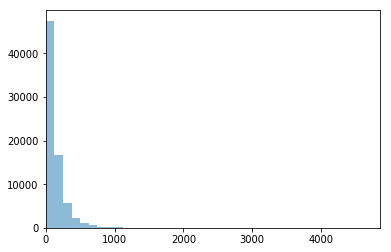

In [23]:
import numpy as np
import math
from matplotlib import pyplot as plt
total_list_clean = removeOutliers(len_statis, 2)
data2 = len_statis
bins = np.linspace(math.ceil(min(data2)), 
                   math.floor(max(data2)),
                   40) # fixed number of bins

plt.xlim([min(data2)-5, max(data2)+5])
plt.hist(data2, bins=bins, alpha=0.5)
plt.show()

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from scipy.sparse import vstack
import spacy
import tools
import imp
import scipy
import time
from sklearn.decomposition import online_lda
from sklearn.linear_model import LogisticRegression

In [4]:
sw = tools.stop_word()
FIXED_SEED = 0
lemma_text = tools.read_lemma_data()
imp.reload(tools)
Cvectorizer = CountVectorizer(max_df = 0.5,min_df=10,stop_words=sw,token_pattern=r"(?u)\b\d?[a-z]{2,}\d?\b",ngram_range=(1,1))
Cvectorizer.fit_transform(lemma_text)
total_vec,myCViterator = tools.total_vect_cv_prepare(vectorizer=Cvectorizer,dummy_document = 'dummy_doc_1015_tfidf_exclusive')
Count_vec = total_vec[:-4]

In [5]:
from joblib import load
lda = load('final_lda')
topics = lda.transform(Count_vec)
topic_count = np.sum(topics,axis=0)
topic_count = topic_count / np.sum(topic_count)
log = 'Topic {}: {:0.4f} '
for i in np.argsort(-topic_count):
    print(log.format(i,topic_count[i]))

Topic 26: 0.1058 
Topic 22: 0.0882 
Topic 33: 0.0880 
Topic 32: 0.0752 
Topic 21: 0.0720 
Topic 9: 0.0492 
Topic 15: 0.0485 
Topic 1: 0.0427 
Topic 34: 0.0408 
Topic 27: 0.0388 
Topic 11: 0.0358 
Topic 16: 0.0352 
Topic 17: 0.0338 
Topic 18: 0.0314 
Topic 29: 0.0311 
Topic 19: 0.0307 
Topic 31: 0.0274 
Topic 25: 0.0211 
Topic 30: 0.0156 
Topic 24: 0.0105 
Topic 28: 0.0096 
Topic 36: 0.0076 
Topic 2: 0.0059 
Topic 39: 0.0054 
Topic 8: 0.0045 
Topic 35: 0.0044 
Topic 7: 0.0042 
Topic 3: 0.0041 
Topic 20: 0.0037 
Topic 37: 0.0036 
Topic 6: 0.0034 
Topic 10: 0.0033 
Topic 13: 0.0030 
Topic 12: 0.0029 
Topic 14: 0.0026 
Topic 0: 0.0023 
Topic 23: 0.0022 
Topic 38: 0.0020 
Topic 5: 0.0018 
Topic 4: 0.0017 


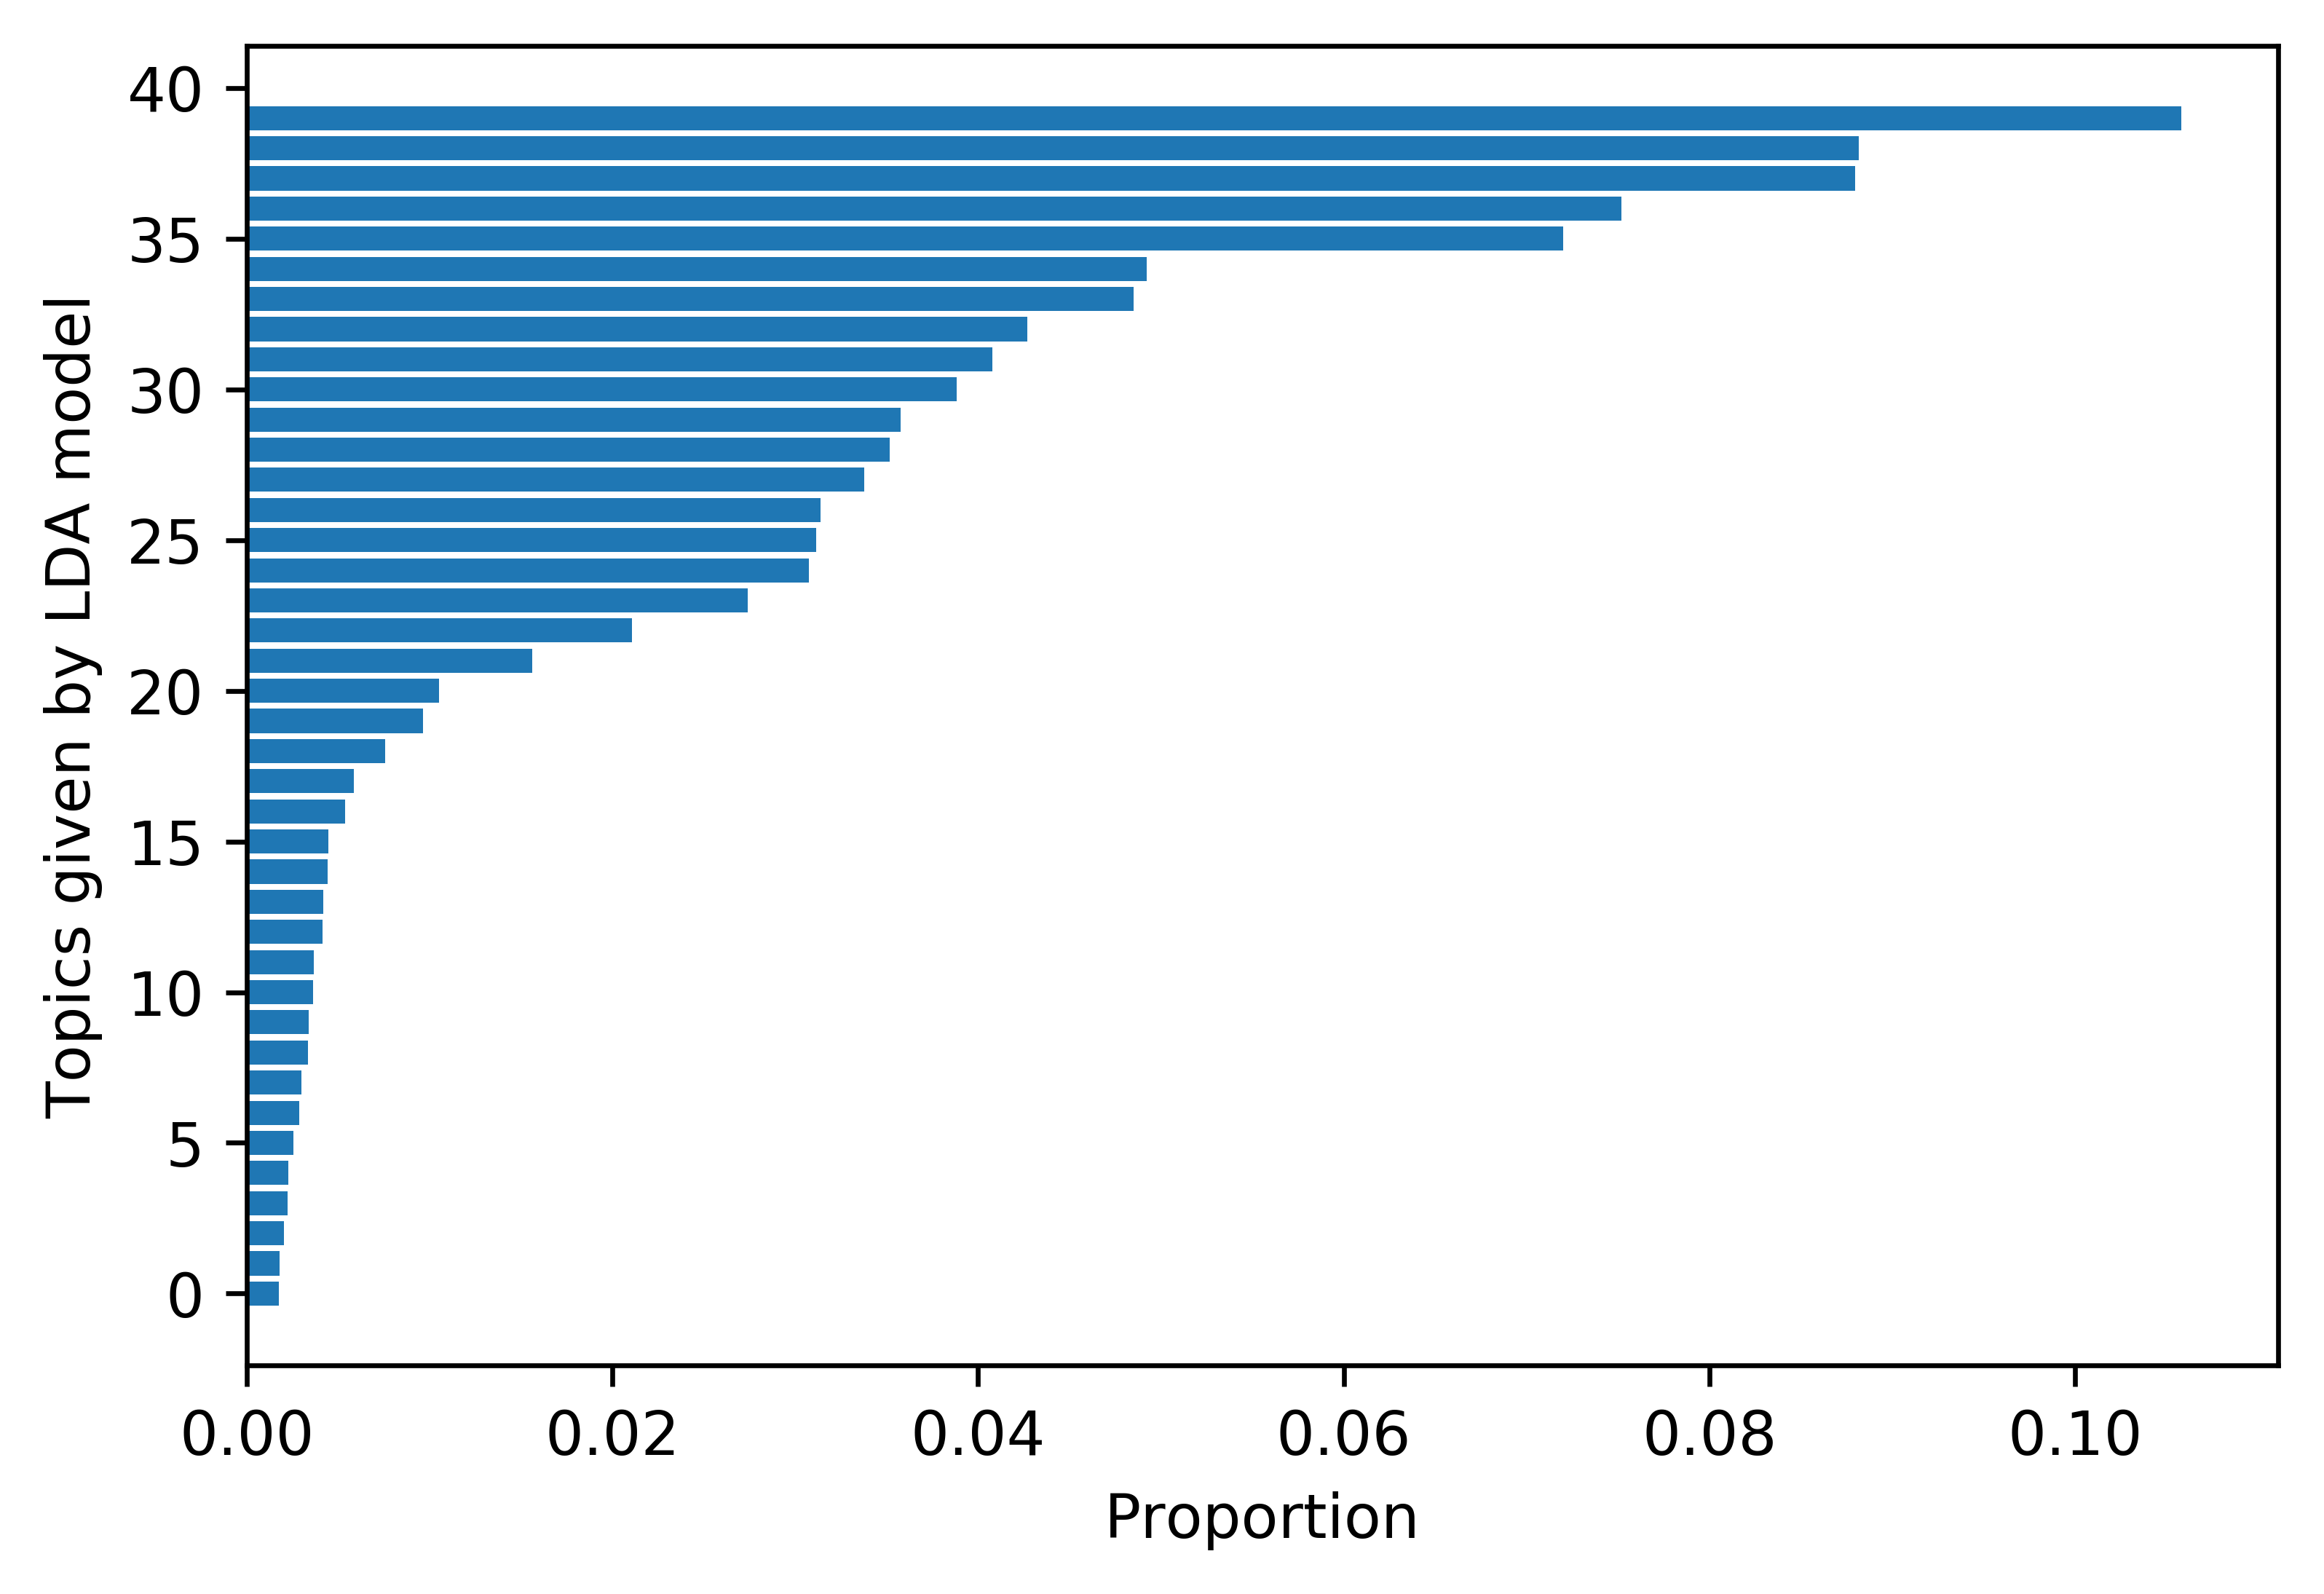

In [6]:
import numpy as np
import matplotlib.pyplot as plt
topic_count.sort()
y_pos = np.arange(len(topic_count))
plt.figure(dpi= 600)

plt.barh(y_pos, topic_count)#, color=['black', 'red', 'green', 'blue', 'cyan'])
#plt.yticks(y_pos, y_pos)
plt.xlabel('Proportion')
plt.ylabel('Topics given by LDA model')
plt.show()


<BarContainer object of 40 artists>

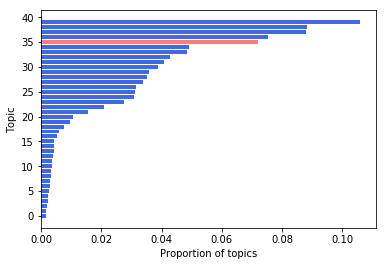

In [7]:
i=35
curr_color = ['royalblue']*40
curr_color[i] = 'salmon'
plt.xlabel('Proportion of topics')
plt.ylabel('Topic')

plt.barh(y_pos, topic_count,color=curr_color)

In [8]:
NB_vect = total_vec[-4:]
#lda = grid.best_estimator_
NB_topic_dist = lda.transform(NB_vect)
#report_topic = lda2.transform(count_vec)
print('Access : ')
to_topic = np.argpartition(NB_topic_dist[0],-5)[-5:]
print(to_topic)
print(NB_topic_dist[0,to_topic])

print('\nDelivery of care : ')
to_topic = np.argpartition(NB_topic_dist[1],-5)[-5:]
print(to_topic)
print(NB_topic_dist[1,to_topic])

print('\nEnvironment : ')
to_topic = np.argpartition(NB_topic_dist[2],-5)[-5:]
print(to_topic)
print(NB_topic_dist[2,to_topic])

print('\nFinance : ')
to_topic = np.argpartition(NB_topic_dist[3],-5)[-5:]
print(to_topic)
print(NB_topic_dist[3,to_topic])

tools.NB_loss_function(0,NB_topic_dist)

Access : 
[22  9  1 29 26]
[0.05182201 0.09139938 0.0979688  0.16870217 0.32806   ]

Delivery of care : 
[16 27 33 22 21]
[0.05650657 0.16575313 0.17731222 0.06356018 0.1395881 ]

Environment : 
[10 33 17 29 25]
[0.03261364 0.03312411 0.50245662 0.30039811 0.04388648]

Finance : 
[35 16 34 31 19]
[0.03719671 0.05190349 0.37555389 0.26498016 0.1076021 ]
Entropy Loss: -8.506989214428922
Corr Loss: 0.1529750112814523


-10.036739327243446

In [ ]:
weight_list.reverse()
weight_cumsum = np.array(weight_list).cumsum()
plt.xticks(rotation=90)
plt.figure(dpi= 600)

plt.rc('xtick', labelsize=5) 
word_list.reverse()
plt.plot(word_list, weight_cumsum)

In [ ]:
weight_cumsum = np.array(weight_list).cumsum()

In [ ]:
import pickle
with open('index_mapping_list','rb') as f:
    index_mapping_list = pickle.load(f)

In [ ]:
filename = '~/data/patient_report/all_patient_data.csv'
df = pd.read_csv(filename)
df['Primary / secondary category'].fillna(' ',inplace=True)
df['Full action description'].fillna(' ',inplace=True)

df2 = df[df['Primary / secondary category'] != ' ']

df2 = df2[df2['Full action description'] != ' ']

print(len(df2))

subject = df2['Action subject'].fillna(' ').to_list()
full_text = df2['Full action description'].fillna(' ').to_list()

In [ ]:
lemma_filtered_text = tools.read_filtered_lemma_data()
Count_vec2 = Cvectorizer.transform(lemma_filtered_text)
imp.reload(tools)
tools.show_lda_example(Count_vec2,lda,full_text,index_mapping_list,example_num=15,thres=0.8)
#tools.show_lda_example(Count_vec2,lda,lemma_filtered_text,example_num=15,thres=0.8)

In [ ]:
tools.show_lda_example(Count_vec2,lda,full_text,index_mapping_list,example_num=15,thres=0.5)

In [ ]:
tools.show_lda_example(Count_vec2,lda,full_text,index_mapping_list,example_num=15,thres=0.3)

In [8]:
import imp
imp.reload(tools)
Count_vec = total_vec[:-4]
topics = lda.transform(Count_vec)
topic_count = np.sum(topics,axis=0)
topic_sort = np.argsort(topic_count)
rev_sort = []
for i in range(len(topic_sort)-1,-1,-1):
    rev_sort.append(topic_sort[i])
representative_words,representative_weight = tools.print_topic_word(lda,Cvectorizer,word_num=40,weight_list = rev_sort)

Topic 26 appointment, wait, time, clinic, speak, book, clerk, information, contact, explain, phone, office, number, staff, hour, receptionist, doctor, process, schedule, ask, person, leave, procedure, like, cancel, follow, question, appt, date, answer, pcc, advise, booking, happen, request, year, minute, provide, day,

Topic 22 care, home, staff, facility, provide, manager, nursing, plan, term, change, case, meeting, dementia, homecare, transition, bath, need, palliative, senior, hc, management, lack, long, support, ltc, caregiver, agent, living, receive, transfer, client, assist, assistance, level, ensure, staffing, live, resident, lodge,

Topic 33 nurse, come, triage, ask, leave, staff, room, sit, rude, iv, way, hand, check, comment, talk, unprofessional, shift, desk, nursing, clean, hour, night, treat, manner, look, walk, yell, minute, help, attitude, like, reply, start, wait, male, cry, water, pain, compassion,

Topic 32 ed, physician, pain, ct, scan, rdrhc, symptom, emergency, dia